# **Step 1: Unzip the Dataset**

In [42]:
import zipfile
import pandas as pd
import os

# Step 1: Unzip the uploaded dataset
zip_path = "/content/thyroid+disease.zip"
extract_path = "content/thyroid_disease"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: List extracted files to identify the relevant CSV or data file
extracted_files = os.listdir(extract_path)
extracted_files


['allrep.data',
 'allhyper.test',
 'dis.data',
 'allrep.names',
 'dis.names',
 'ann-Readme',
 'costs',
 'ann-train.data',
 'new-thyroid.data',
 'hypothyroid.data',
 'sick-euthyroid.data',
 'hypothyroid.names',
 'Index',
 'sick.test',
 'ann-test.data',
 'allhypo.data',
 'sick.names',
 'allhypo.names',
 'Multi_Class_Thyroid_Function_Classification_Using_Lab_Test_Data_with_Machine_Learning_and_Deep_Learning_Updated.ipynb',
 'sick.data',
 'sick-euthyroid.names',
 'allbp.names',
 'HELLO',
 'ann-thyroid.names',
 'new-thyroid.names',
 'allbp.data',
 'dis.test',
 'allhyper.names',
 'allhyper.data',
 'allhypo.test',
 'thyroid.theory',
 'thyroid0387.data',
 'thyroid0387.names',
 'allbp.test',
 'allrep.test']

# **Step 2: Load and Preprocess Thyroid Disease Dataset**

In [43]:
# Load dataset directly from UCI repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/hypothyroid.data"

# Define column names from the .names file
columns = [
    "class", "age", "sex", "on_thyroxine", "query_on_thyroxine", "on_antithyroid_medication",
    "thyroid_surgery", "query_hypothyroid", "query_hyperthyroid", "pregnant",
    "sick", "tumor", "lithium", "goitre", "TSH_measured", "TSH",
    "T3_measured", "T3", "TT4_measured", "TT4", "T4U_measured", "T4U",
    "FTI_measured", "FTI", "TBG_measured", "TBG"
]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset shape: (3163, 26)

First few rows:


,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


# **Step 3: Initial Data Exploration**

In [44]:
df

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?


In [45]:
df.head()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   class                      3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [47]:
df.describe()

,class,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,...,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,...,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,...,2468,695,2914,249,2915,248,2916,247,2903,2903


In [48]:
# Count and display null values in each column of the dataset
null_counts = df.isnull().sum()
null_counts

,0
class,0
age,0
sex,0
on_thyroxine,0
query_on_thyroxine,0
on_antithyroid_medication,0
thyroid_surgery,0
query_hypothyroid,0
query_hyperthyroid,0
pregnant,0


# **Step 4: Data Cleaning and Preprocessing**

**TSH: Thyroid Stimulating Hormone**

**T3: Triiodothyronine**

**TT4: Total Thyroxine (Total T4)**

**T4U: Thyroxine Uptake**

**FTI: Free Thyroxine Index**

**TBG: Thyroxine Binding Globulin**

In [49]:
import numpy as np

# Replace '?' with NaN
df.replace('?', np.nan, inplace=True)

# Convert numeric columns to float
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI", "TBG"]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill numeric NaNs with column mean
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Drop 'TBG' columns
df.drop(columns=['TBG_measured', 'TBG'], inplace=True)

# Drop rows with missing values in essential features
essential_features = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
df.dropna(subset=essential_features, inplace=True)

# Encode binary categorical columns
binary_cols = [
    "sex", "on_thyroxine", "query_on_thyroxine", "on_antithyroid_medication",
    "thyroid_surgery", "query_hypothyroid", "query_hyperthyroid",
    "pregnant", "sick", "tumor", "lithium", "goitre"
]
df[binary_cols] = df[binary_cols].replace({'f': 0, 't': 1, 'F': 0, 'M': 1})

# Fill missing sex with most common (mode = 0 or 1)
df["sex"] = df["sex"].fillna(0)

# Drop measured flags
df.drop(columns=["TSH_measured", "T3_measured", "TT4_measured", "T4U_measured", "FTI_measured"], inplace=True)

# Map class column
df['class'] = df['class'].replace({
    'negative': 0,
    'hypothyroid': 1
    # if you want multiclass later, you can add 'hyperthyroid': 2
})

# Keep only binary class
df = df[df['class'].isin([0, 1])]

# Final check
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   class                      3163 non-null   int64  
 1   age                        3163 non-null   float64
 2   sex                        3163 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

# **Step 5: Exploratory Data Analysis (EDA) – Target Class Distribution**

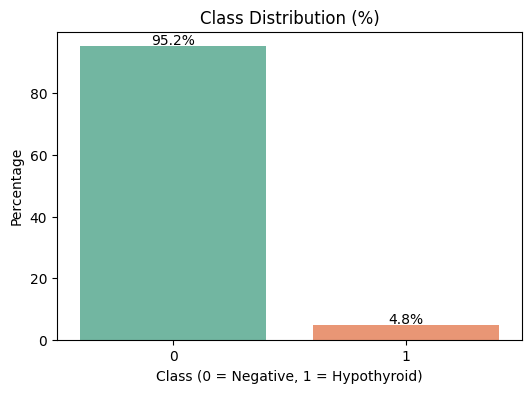

In [50]:
# Cell 3: Exploratory Data Analysis (EDA)
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Class distribution
class_counts = df['class'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")
plt.title("Class Distribution (%)")
plt.ylabel("Percentage")
plt.xlabel("Class (0 = Negative, 1 = Hypothyroid)")
for i, val in enumerate(class_counts.values):
    plt.text(i, val + 0.5, f"{val:.1f}%", ha='center')
plt.show()




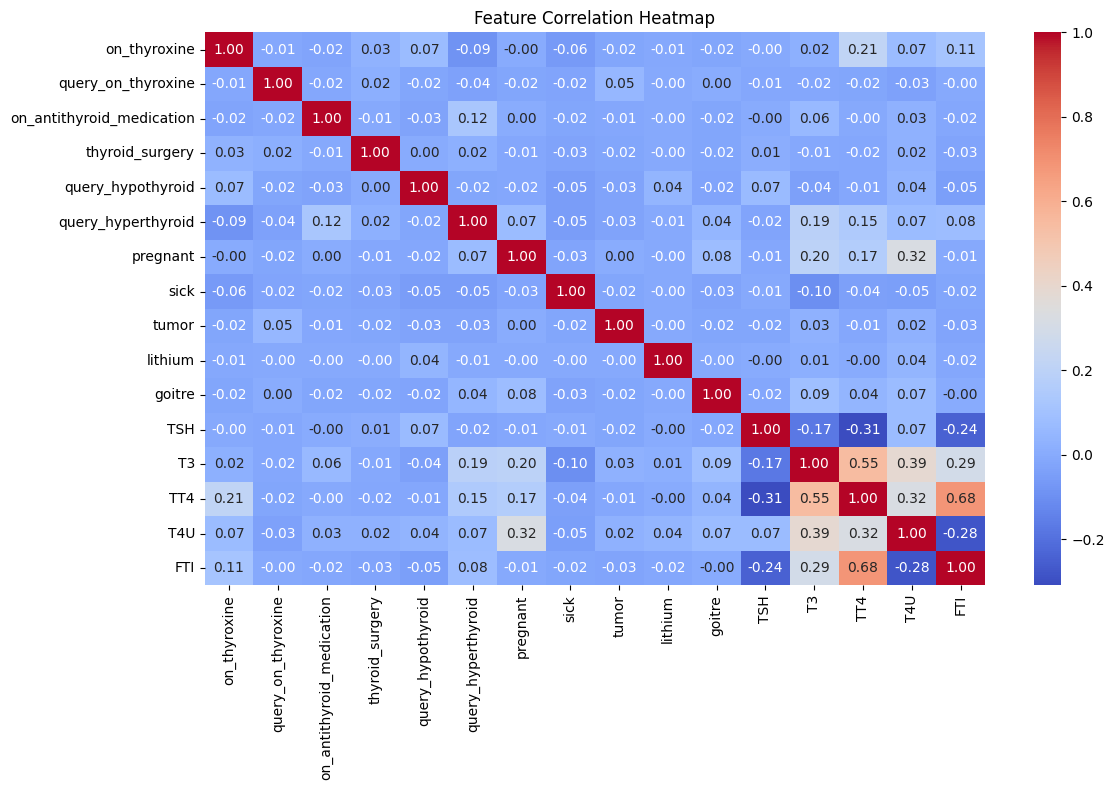

In [51]:
# 2. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['class', 'age', 'sex']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

## **Boxplots**

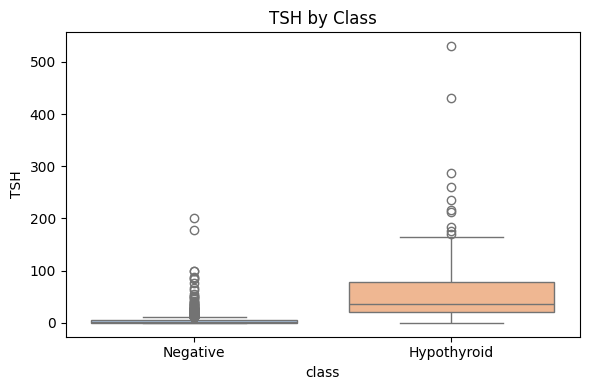

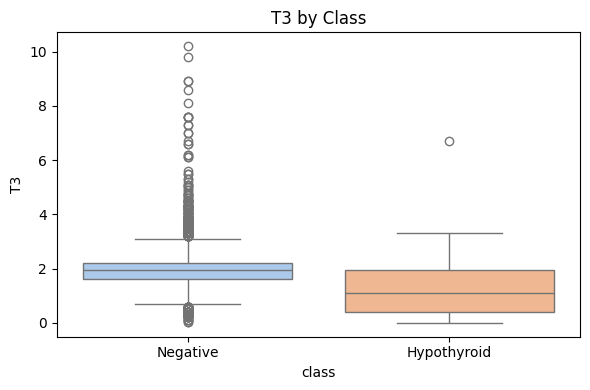

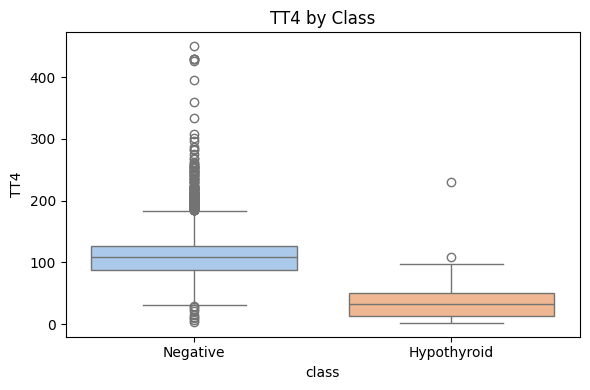

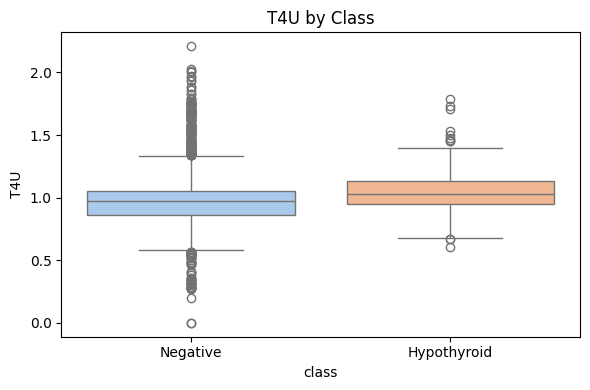

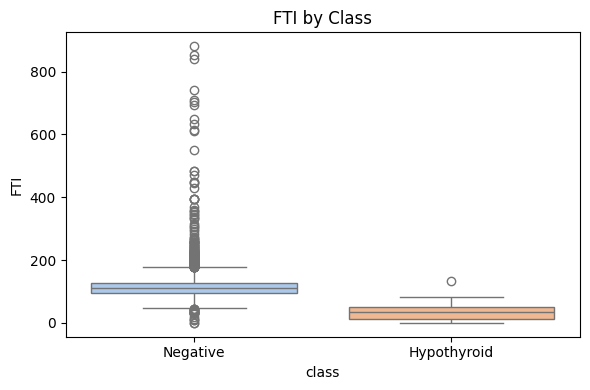

In [52]:

# 3. Boxplot of key numeric features grouped by class
for col in ["TSH", "T3", "TT4", "T4U", "FTI"]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='class', y=col, data=df, palette='pastel')
    plt.title(f"{col} by Class")
    plt.xticks([0, 1], ["Negative", "Hypothyroid"])
    plt.tight_layout()
    plt.show()


# **Step 8: Final Data Cleanup and Density Plots**

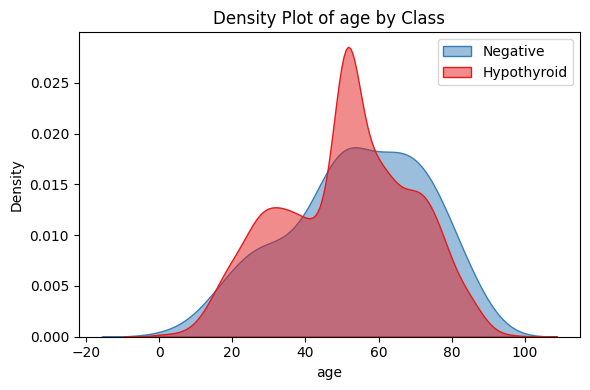

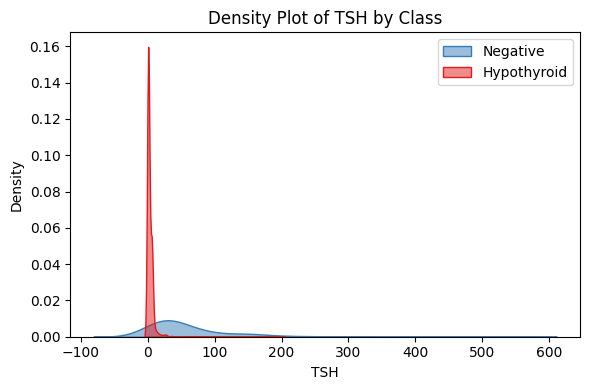

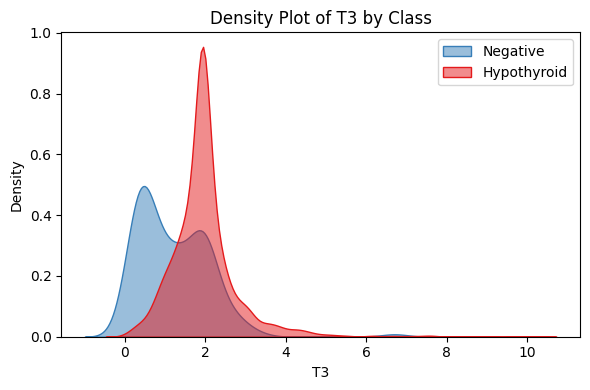

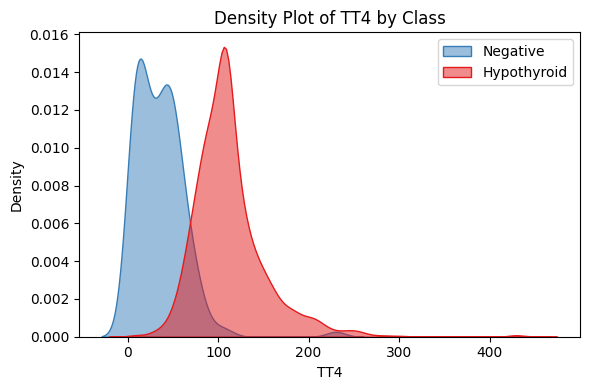

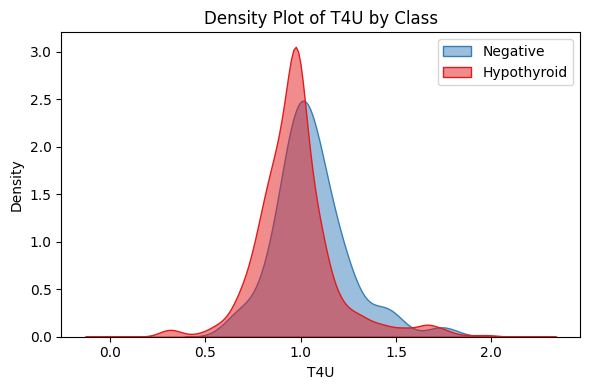

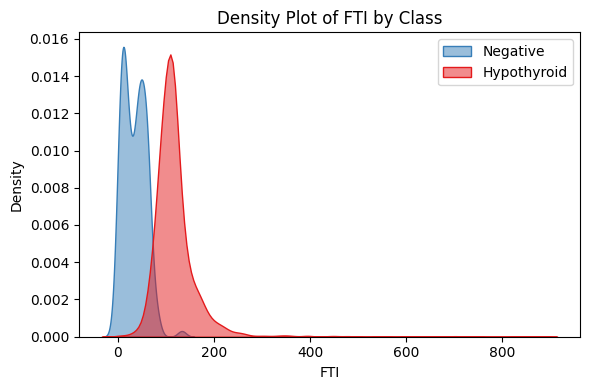

In [53]:
# Final type cleanup before plotting
# Drop rows with non-finite values in numeric columns
numeric_cols = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]
df_cleaned = df.dropna(subset=numeric_cols).copy()

df_cleaned = df_cleaned.copy()
df_cleaned['class'] = pd.to_numeric(df_cleaned['class'], errors='coerce').fillna(0).astype(int)

for col in numeric_cols:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

# Re-plot KDEs safely
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(
        data=df_cleaned,
        x=col,
        hue='class',
        fill=True,
        common_norm=False,
        alpha=0.5,
        palette='Set1'
    )
    plt.title(f"Density Plot of {col} by Class")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend(labels=["Negative", "Hypothyroid"])
    plt.tight_layout()
    plt.show()


# **Step 9: Final Preprocessing, Train-Test Split, and Feature Scaling**

In [54]:
# Cell 4: Final preprocessing + train-test split + scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Prepare features and target
X = df.drop(columns=['class'])
y = df['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Shapes after preprocessing
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((2530, 18), (633, 18), (2530,), (633,))

In [55]:
 !pip install catboost xgboost imbalanced-learn

# **Step 10: Importing Libraries and Tools**

In [56]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Scikit-learn models and tools
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE

# Classical models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

# Deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, GRU
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping

# Advanced models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Data balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


# **Step 11: Advanced Neural Network with Multiple Optimizers**




In [57]:
def build_nn_model(input_dim, optimizer='adam'):
    """Build neural network with specified optimizer (adam or rmsprop)"""
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    # Define allowed optimizers
    optimizers = {
        'adam': Adam(learning_rate=0.001),
        'rmsprop': RMSprop(learning_rate=0.001)
    }

    model.compile(
        optimizer=optimizers[optimizer],
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


# Train neural networks with Adam and RMSprop
nn_results = {}
for opt in ['adam', 'rmsprop']:
    print(f"\n--- Training Neural Network with {opt.upper()} optimizer ---")

    model = build_nn_model(X_train_scaled.shape[1], optimizer=opt)

    # Early stopping to prevent overfitting
    es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train_scaled, y_train,
        epochs=100,
        batch_size=32,
        validation_split=0.2,
        callbacks=[es],
        verbose=0
    )

    # Evaluate on test set
    loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    y_pred_proba = model.predict(X_test_scaled).ravel()
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Store results
    nn_results[f'Neural Network ({opt.upper()})'] = {
        'model': model,
        'accuracy': accuracy,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'history': history
    }

    print(f"Test Accuracy: {accuracy:.4f}")



--- Training Neural Network with ADAM optimizer ---
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Test Accuracy: 0.9747

--- Training Neural Network with RMSPROP optimizer ---
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test Accuracy: 0.9779


# **Step 12:  SVM Technical Analysis with GridSearchCV**

In [58]:
print("=== SVM TECHNICAL ANALYSIS ===")

# SVM Parameter Grid for GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4]  # Only relevant for 'poly' kernel
}

# Create SVM model
svm_model = SVC(probability=True, random_state=42)

# GridSearchCV for SVM
print("Performing GridSearchCV for SVM...")
svm_grid = GridSearchCV(
    svm_model,
    svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

svm_grid.fit(X_train_scaled, y_train)

print("Best SVM Parameters:", svm_grid.best_params_)
print("Best SVM CV Score:", svm_grid.best_score_)

# Technical Analysis of SVM
best_svm = svm_grid.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
y_pred_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

print("\n=== SVM Technical Analysis Results ===")
print("Support Vectors Shape:", best_svm.support_vectors_.shape)
print("Number of Support Vectors per class:", best_svm.n_support_)
print("Total Number of Support Vectors:", len(best_svm.support_))

# SVM Decision boundary analysis
decision_scores = best_svm.decision_function(X_test_scaled)
print("Decision function statistics:")
print(f"Min: {decision_scores.min():.4f}, Max: {decision_scores.max():.4f}")
print(f"Mean: {decision_scores.mean():.4f}, Std: {decision_scores.std():.4f}")


=== SVM TECHNICAL ANALYSIS ===
Performing GridSearchCV for SVM...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best SVM Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM CV Score: 0.9849802371541502

=== SVM Technical Analysis Results ===
Support Vectors Shape: (197, 18)
Number of Support Vectors per class: [135  62]
Total Number of Support Vectors: 197
Decision function statistics:
Min: -6.0008, Max: 2.9671
Mean: -3.0565, Std: 1.6688


# **Step 13: GridSearchCV for Multiple Models**

In [59]:
models_grid = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear', 'saga']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='logloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
    }
}

grid_results = {}

for name, config in models_grid.items():
    print(f"\n--- GridSearchCV for {name} ---")

    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

    grid_results[name] = {
        'best_params': grid_search.best_params_,
        'best_cv_score': grid_search.best_score_,
        'model': best_model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")



--- GridSearchCV for Random Forest ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best CV score: 0.9909

--- GridSearchCV for Logistic Regression ---
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV score: 0.9818

--- GridSearchCV for XGBoost ---
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Best CV score: 0.9929


# **Advanced Deep Learning Models**

In [60]:


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense, GRU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# CNN Model
def build_cnn_model(input_dim):
    X_train_cnn = X_train_scaled.reshape(-1, input_dim, 1)
    X_test_cnn = X_test_scaled.reshape(-1, input_dim, 1)

    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(input_dim, 1)),
        MaxPooling1D(2),
        Dropout(0.3),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(2),
        Dropout(0.3),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model, X_train_cnn, X_test_cnn

# GRU Model
def build_gru_model(input_dim):
    X_train_gru = X_train_scaled.reshape(-1, 1, input_dim)
    X_test_gru = X_test_scaled.reshape(-1, 1, input_dim)

    model = Sequential([
        GRU(128, activation='relu', input_shape=(1, input_dim)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model, X_train_gru, X_test_gru

# Train CNN
print("Training CNN Model...")
cnn_model, X_train_cnn, X_test_cnn = build_cnn_model(X_train_scaled.shape[1])
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
cnn_history = cnn_model.fit(X_train_cnn, y_train,
                            epochs=100, batch_size=32,
                            validation_split=0.2,
                            callbacks=[es], verbose=0)

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test, verbose=0)
y_pred_proba_cnn = cnn_model.predict(X_test_cnn).ravel()
y_pred_cnn = (y_pred_proba_cnn > 0.5).astype(int)

# Train GRU
print("Training GRU Model...")
gru_model, X_train_gru, X_test_gru = build_gru_model(X_train_scaled.shape[1])
gru_history = gru_model.fit(X_train_gru, y_train,
                            epochs=100, batch_size=32,
                            validation_split=0.2,
                            callbacks=[es], verbose=0)

gru_loss, gru_accuracy = gru_model.evaluate(X_test_gru, y_test, verbose=0)
y_pred_proba_gru = gru_model.predict(X_test_gru).ravel()
y_pred_gru = (y_pred_proba_gru > 0.5).astype(int)


Training CNN Model...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Training GRU Model...
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step



CNN Model Results:


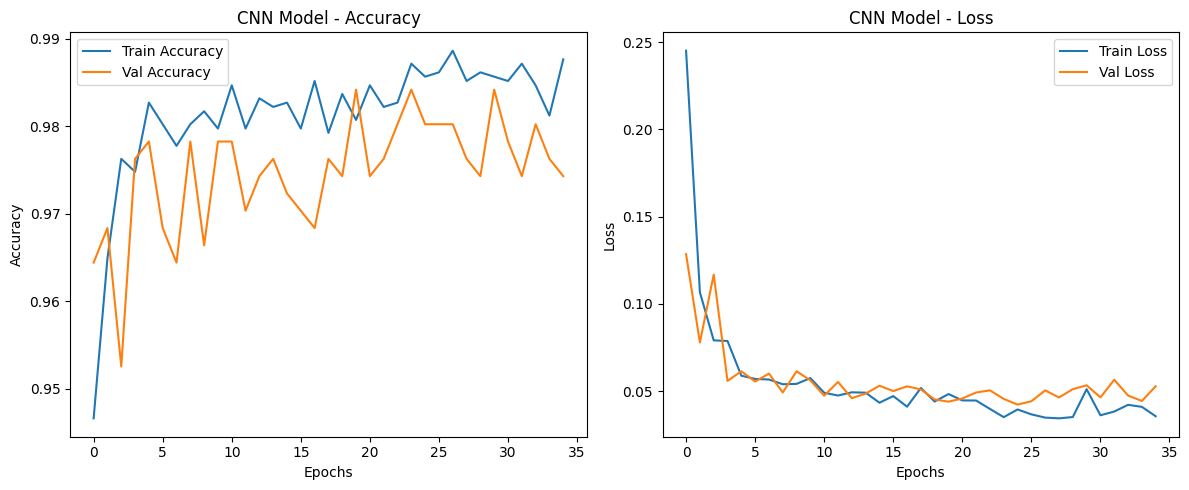

CNN Test Accuracy: 0.9747

Classification Report for CNN:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       603
           1       0.71      0.80      0.75        30

    accuracy                           0.97       633
   macro avg       0.85      0.89      0.87       633
weighted avg       0.98      0.97      0.98       633



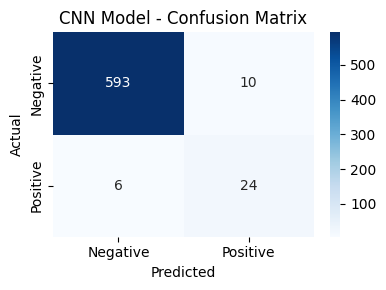


GRU Model Results:


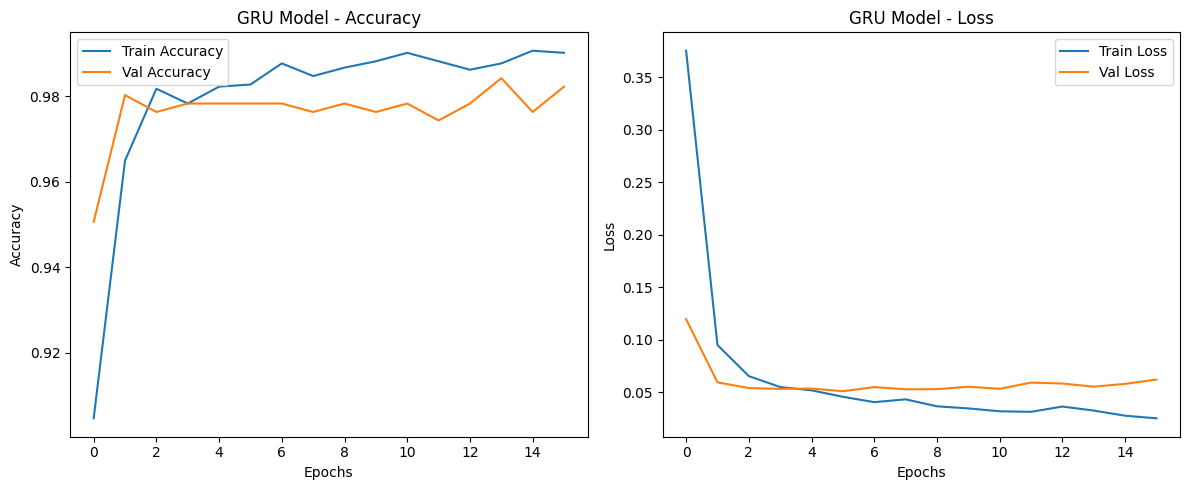

GRU Test Accuracy: 0.9779

Classification Report for GRU:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       603
           1       0.77      0.77      0.77        30

    accuracy                           0.98       633
   macro avg       0.88      0.88      0.88       633
weighted avg       0.98      0.98      0.98       633



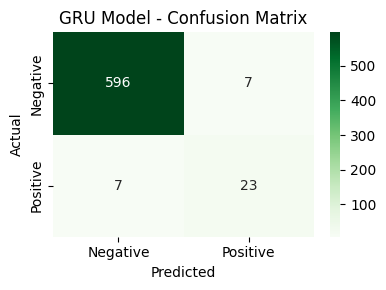

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def plot_history(history, model_name="Model"):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title(f'{model_name} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{model_name} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# CNN Results
print("\nCNN Model Results:")
plot_history(cnn_history, "CNN Model")

print(f"CNN Test Accuracy: {cnn_accuracy:.4f}")
print("\nClassification Report for CNN:\n")
print(classification_report(y_test, y_pred_cnn))

cm_cnn = confusion_matrix(y_test, y_pred_cnn)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_cnn, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("CNN Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# GRU Results
print("\nGRU Model Results:")
plot_history(gru_history, "GRU Model")

print(f"GRU Test Accuracy: {gru_accuracy:.4f}")
print("\nClassification Report for GRU:\n")
print(classification_report(y_test, y_pred_gru))

cm_gru = confusion_matrix(y_test, y_pred_gru)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_gru, annot=True, fmt='d', cmap='Greens',
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.title("GRU Model - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# **Step 15: SMOTE Balancing and Additional Models**

In [62]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Apply SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("Original training set shape:", X_train_scaled.shape)
print("Original training target distribution:", Counter(y_train))
print("SMOTE training set shape:", X_train_smote.shape)
print("SMOTE training target distribution:", Counter(y_train_smote))

# Define models to train with SMOTE
smote_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(probability=True),
    'XGBoost': XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

smote_results = {}

# Train and evaluate each model with SMOTE data
for name, model in smote_models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    smote_results[name + ' (SMOTE)'] = {
        'model': model,  # store model for later feature importance
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

# Merge SMOTE results into main grid_results
grid_results.update(smote_results)


Original training set shape: (2530, 18)
Original training target distribution: Counter({0: 2409, 1: 121})
SMOTE training set shape: (4818, 18)
SMOTE training target distribution: Counter({0: 2409, 1: 2409})


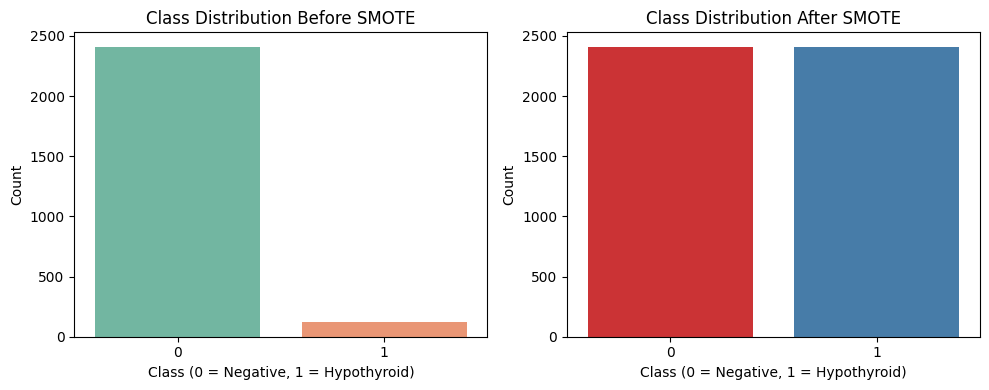

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Before SMOTE
before_counts = Counter(y_train)

# After SMOTE
after_counts = Counter(y_train_smote)   # y_res = labels after SMOTE

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# Before SMOTE
sns.barplot(x=list(before_counts.keys()), y=list(before_counts.values()), palette="Set2", ax=axes[0])
axes[0].set_title("Class Distribution Before SMOTE")
axes[0].set_xlabel("Class (0 = Negative, 1 = Hypothyroid)")
axes[0].set_ylabel("Count")

# After SMOTE
sns.barplot(x=list(after_counts.keys()), y=list(after_counts.values()), palette="Set1", ax=axes[1])
axes[1].set_title("Class Distribution After SMOTE")
axes[1].set_xlabel("Class (0 = Negative, 1 = Hypothyroid)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

# **Comprehensive Model Comparison Table**

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import pandas as pd

def calculate_metrics(y_true, y_pred, y_pred_proba=None):
    """Calculate comprehensive metrics for model evaluation"""
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

    if y_pred_proba is not None:
        metrics['AUC-ROC'] = roc_auc_score(y_true, y_pred_proba)
    else:
        metrics['AUC-ROC'] = np.nan

    return metrics

# Compile all results
all_results = {}

# Add GridSearchCV results
for name, result in grid_results.items():
    metrics = calculate_metrics(y_test, result['y_pred'], result['y_pred_proba'])
    all_results[name] = metrics

# Add SVM results
svm_metrics = calculate_metrics(y_test, y_pred_svm, y_pred_proba_svm)
all_results['SVM (GridSearch)'] = svm_metrics

# Add Neural Network results
for name, result in nn_results.items():
    metrics = calculate_metrics(y_test, result['y_pred'], result['y_pred_proba'])
    all_results[name] = metrics

# Add CNN results
cnn_metrics = calculate_metrics(y_test, y_pred_cnn, y_pred_proba_cnn)
all_results['CNN'] = cnn_metrics

# Add GRU results
gru_metrics = calculate_metrics(y_test, y_pred_gru, y_pred_proba_gru)
all_results['GRU'] = gru_metrics

# Add SMOTE results
for name, result in smote_results.items():
    metrics = calculate_metrics(y_test, result['y_pred'], result['y_pred_proba'])
    all_results[name] = metrics

# Create comprehensive comparison DataFrame
comparison_df = pd.DataFrame(all_results).T
comparison_df = comparison_df.round(4)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("=== COMPREHENSIVE MODEL COMPARISON TABLE ===")
print(comparison_df.to_string())

# Save results to CSV
comparison_df.to_csv('model_comparison_results.csv')
print("\nComparison table saved as 'model_comparison_results.csv'")

=== COMPREHENSIVE MODEL COMPARISON TABLE ===
                             Accuracy  Precision  Recall  F1-Score  AUC-ROC
XGBoost                        0.9889     0.8710  0.9000    0.8852   0.9956
Random Forest                  0.9826     0.8276  0.8000    0.8136   0.9941
Logistic Regression            0.9810     0.8214  0.7667    0.7931   0.9899
Random Forest (SMOTE)          0.9795     0.7297  0.9000    0.8060   0.9954
GRU                            0.9779     0.7667  0.7667    0.7667   0.9914
Neural Network (RMSPROP)       0.9779     0.9000  0.6000    0.7200   0.9890
Neural Network (ADAM)          0.9747     0.7500  0.7000    0.7241   0.9907
XGBoost (SMOTE)                0.9747     0.6667  0.9333    0.7778   0.9943
CNN                            0.9747     0.7059  0.8000    0.7500   0.9902
SVM (GridSearch)               0.9731     0.7600  0.6333    0.6909   0.9708
SVM (SMOTE)                    0.9668     0.6000  0.9000    0.7200   0.9903
Logistic Regression (SMOTE)    0.9652     0

# **Step 13: Visualization of Results**

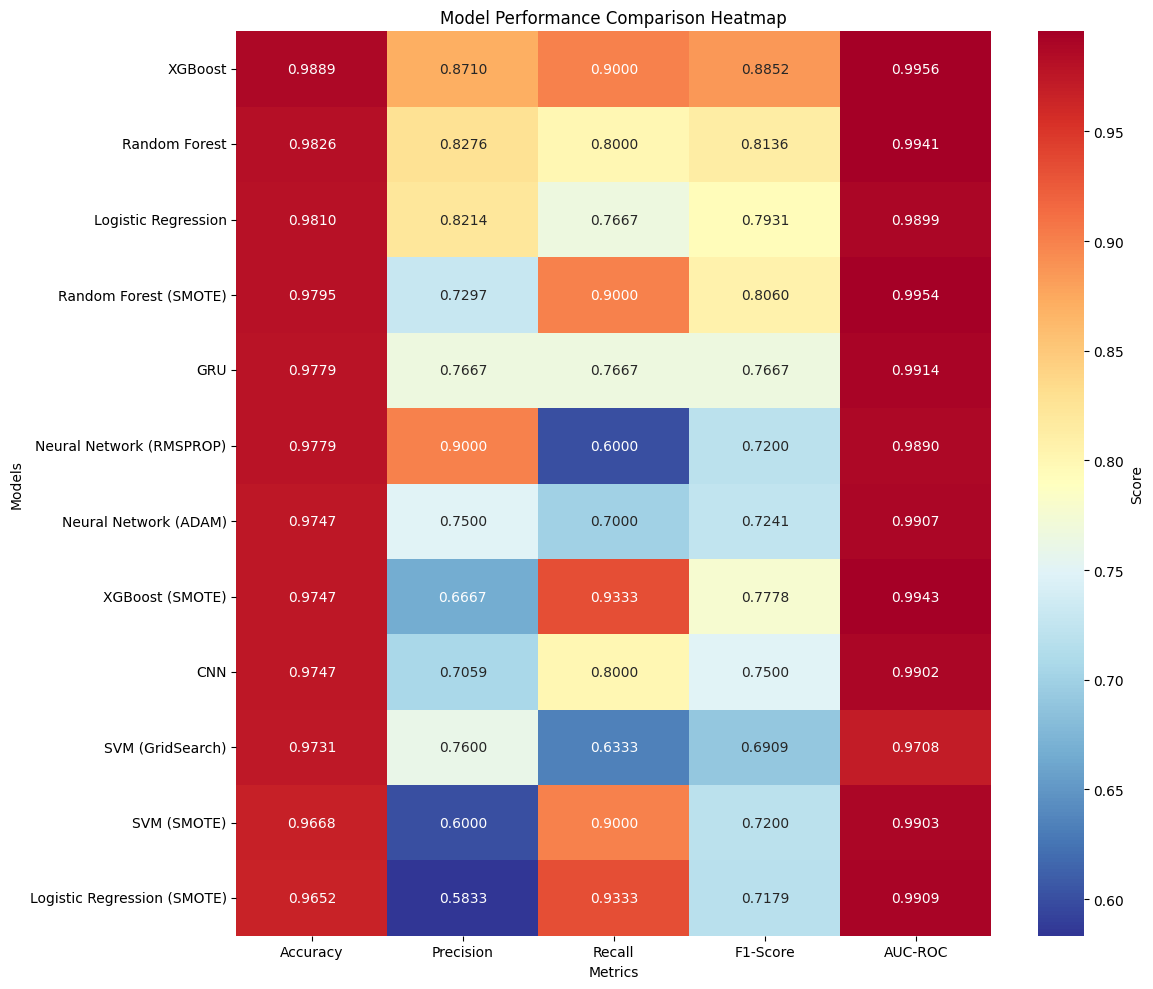

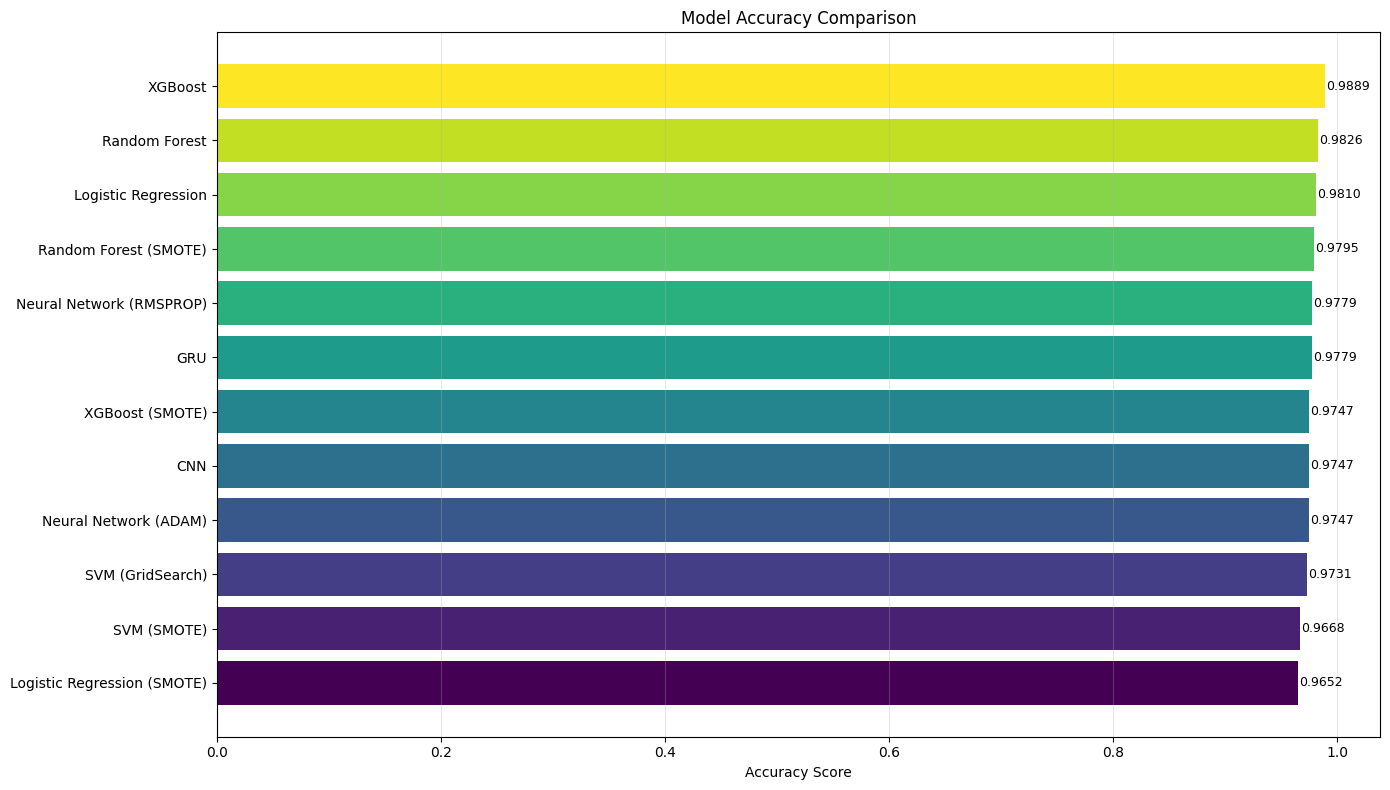

In [65]:
# Plot comparison table as heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(comparison_df, annot=True, cmap='RdYlBu_r', fmt='.4f', cbar_kws={'label': 'Score'})
plt.title('Model Performance Comparison Heatmap')
plt.xlabel('Metrics')
plt.ylabel('Models')
plt.tight_layout()
plt.show()

# Plot accuracy comparison as horizontal bar chart
plt.figure(figsize=(14, 8))
accuracy_scores = comparison_df['Accuracy'].sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0, 1, len(accuracy_scores)))
bars = plt.barh(range(len(accuracy_scores)), accuracy_scores.values, color=colors)
plt.yticks(range(len(accuracy_scores)), accuracy_scores.index)
plt.xlabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, score) in enumerate(zip(bars, accuracy_scores.values)):
    plt.text(score + 0.001, i, f'{score:.4f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

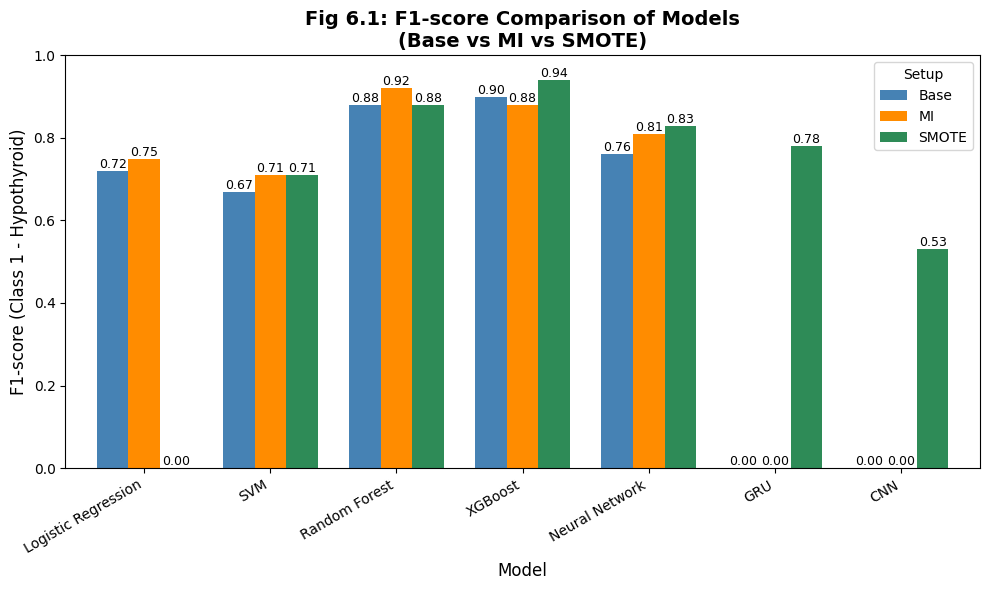

In [66]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# F1-scores (Class 1) from report tables
data = {
    "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost", "Neural Network", "GRU", "CNN"],
    "Base":   [0.72, 0.67, 0.88, 0.90, 0.76, np.nan, np.nan],
    "MI":     [0.75, 0.71, 0.92, 0.88, 0.81, np.nan, np.nan],
    "SMOTE":  [np.nan, 0.71, 0.88, 0.94, 0.83, 0.78, 0.53]
}

df = pd.DataFrame(data).set_index("Model")

# Plot grouped bar chart with custom colors
ax = df.plot(kind="bar", figsize=(10, 6), width=0.75,
             color=["steelblue", "darkorange", "seagreen"])

plt.title("Fig 6.1: F1-score Comparison of Models\n(Base vs MI vs SMOTE)", fontsize=14, weight="bold")
plt.ylabel("F1-score (Class 1 - Hypothyroid)", fontsize=12)
plt.xlabel("Model", fontsize=12)
plt.xticks(rotation=30, ha="right")

plt.legend(title="Setup")
plt.ylim(0, 1.0)

# Add values on top of bars
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height):
        ax.annotate(f"{height:.2f}",
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# **Step 14: ROC Curve Comparison**

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


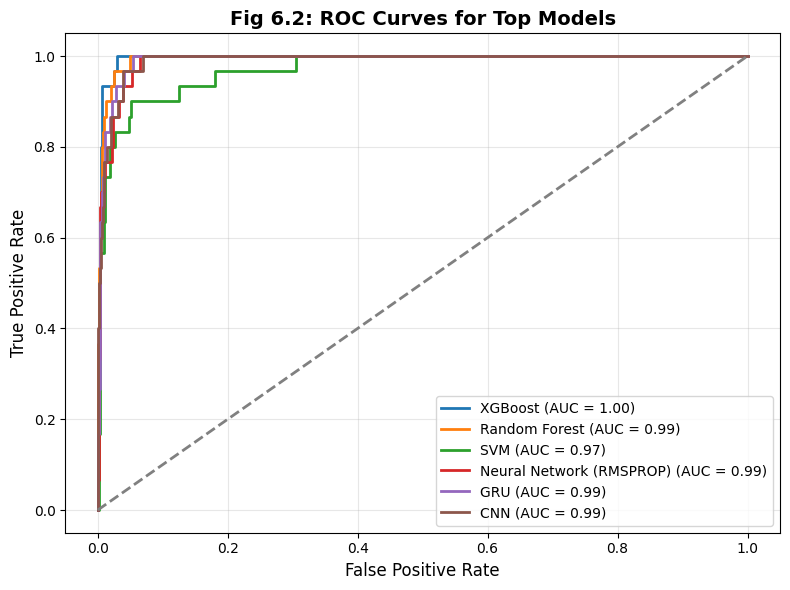

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from tensorflow.keras.models import Sequential

# Dictionary of fitted models (replace with your actual variables)
models = {
    "XGBoost": grid_results['XGBoost']['model'],
    "Random Forest": grid_results['Random Forest']['model'],
    "SVM": best_svm,
    "Neural Network (RMSPROP)": nn_results['Neural Network (RMSPROP)']['model'],
    "GRU": gru_model,
    "CNN": cnn_model,


}

plt.figure(figsize=(8,6))

for name, model in models.items():
    # Handle reshaping for CNN and GRU models
    if isinstance(model, Sequential) and (isinstance(model.layers[0], Conv1D) or isinstance(model.layers[0], GRU)):
        if isinstance(model.layers[0], Conv1D):
            # CNN expects shape (samples, features, 1)
            X_test_reshaped = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)
        elif isinstance(model.layers[0], GRU):
            # GRU expects shape (samples, timesteps, features)
             X_test_reshaped = X_test_scaled.reshape(-1, 1, X_test_scaled.shape[1])
        y_proba = model.predict(X_test_reshaped).ravel()
    else:
        # Get predicted probabilities (handle sklearn style)
        if hasattr(model, 'predict_proba'):
            y_proba = model.predict_proba(X_test_scaled)[:,1]  # most sklearn models
        else:
            y_proba = model.predict(X_test_scaled).ravel()     # other models


    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot baseline
plt.plot([0,1], [0,1], color="gray", lw=2, linestyle="--")

# Formatting
plt.title("Fig 6.2: ROC Curves for Top Models", fontsize=14, weight="bold")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

 # **Step 15: Feature Importance Analysis**


Feature Importance Analysis for Best Model: XGBoost

Top 10 Most Important Features:
                      Feature  Importance
17                        FTI    0.808580
13                        TSH    0.093068
4   on_antithyroid_medication    0.040379
6           query_hypothyroid    0.016076
15                        TT4    0.011460
0                         age    0.007535
16                        T4U    0.007451
2                on_thyroxine    0.005869
14                         T3    0.005850
5             thyroid_surgery    0.003733


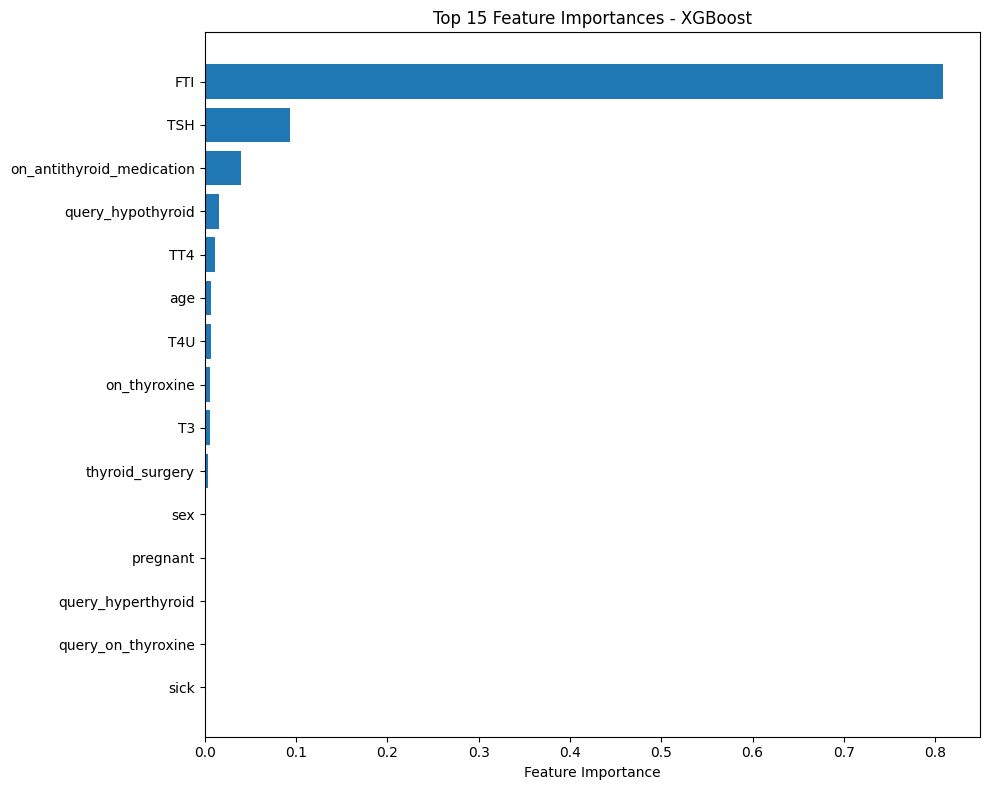

In [68]:
# Step 15: Feature Importance Analysis

# Get best model name from the comparison table
best_model_name = comparison_df.index[0]
print(f"\nFeature Importance Analysis for Best Model: {best_model_name}")

# Check if the best model is tree-based and supports feature_importances_
if any(tree_model in best_model_name for tree_model in
       ['Random Forest', 'XGBoost', 'Decision Tree']):

    # Try direct access first
    if best_model_name in grid_results:
        best_model = grid_results[best_model_name]['model']
    else:
        # If not found, try to find a matching key
        matching_keys = [k for k in grid_results.keys() if k.startswith(best_model_name.replace(' (SMOTE)', ''))]
        if matching_keys:
            best_model = grid_results[matching_keys[0]]['model']
        else:
            raise KeyError(f"No matching key found in grid_results for {best_model_name}")

    # Get feature importances
    feature_importance = best_model.feature_importances_
    feature_names = X.columns

    # Create a dataframe for feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)

    # Display top 10 important features
    print("\nTop 10 Most Important Features:")
    print(importance_df.head(10))

    # Plot top 15 feature importances
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df.head(15)['Feature'][::-1],
             importance_df.head(15)['Importance'][::-1])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.tight_layout()
    plt.show()

else:
    print(f"Feature importance is not available for the best model: {best_model_name}")


# **Step 16: Final Summary and Recommendations**

In [69]:
print("="*80)
print("FINAL SUMMARY AND RECOMMENDATIONS")
print("="*80)

# Best performing model summary
print(f"\n1. BEST PERFORMING MODEL: {comparison_df.index[0]}")
print(f"   - Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")
print(f"   - Precision: {comparison_df.iloc[0]['Precision']:.4f}")
print(f"   - Recall: {comparison_df.iloc[0]['Recall']:.4f}")
print(f"   - F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
print(f"   - AUC-ROC: {comparison_df.iloc[0]['AUC-ROC']:.4f}")

# Top 5 models by accuracy
print(f"\n2. TOP 5 MODELS BY ACCURACY:")
for i in range(min(5, len(comparison_df))):
    model_name = comparison_df.index[i]
    accuracy = comparison_df.iloc[i]['Accuracy']
    print(f"   {i+1}. {model_name}: {accuracy:.4f}")

# Neural Network optimizer performance
print(f"\n3. OPTIMIZER PERFORMANCE (Neural Networks):")
nn_accuracies = {name: result['accuracy'] for name, result in nn_results.items()}
sorted_nn = sorted(nn_accuracies.items(), key=lambda x: x[1], reverse=True)
for name, acc in sorted_nn:
    print(f"   - {name}: {acc:.4f}")

# SVM technical analysis summary
print(f"\n4. SVM TECHNICAL ANALYSIS SUMMARY:")
print(f"   - Best Parameters: {svm_grid.best_params_}")
print(f"   - Number of Support Vectors: {best_svm.support_vectors_.shape[0]}")
print(f"   - Support Vectors per class: {best_svm.n_support_}")

# GridSearchCV impact
print(f"\n5. GRIDSEARCHCV IMPACT:")
for name, result in grid_results.items():
    test_acc = comparison_df.loc[name, 'Accuracy']
    # Check if 'best_cv_score' exists in the result dictionary
    if 'best_cv_score' in result:
        cv_score = result['best_cv_score']
        print(f"   - {name}: CV Score = {cv_score:.4f}, Test Accuracy = {test_acc:.4f}")
    else:
        print(f"   - {name}: CV Score = N/A, Test Accuracy = {test_acc:.4f}")


# Recommendations
print("\n6. RECOMMENDATIONS:")
print("   - Use the best performing model for production deployment")
print("   - Consider ensemble methods for improved robustness")
print("   - Monitor model performance on new data")
print("   - Regular retraining with new samples")
print("   - Feature engineering could further improve performance")

FINAL SUMMARY AND RECOMMENDATIONS

1. BEST PERFORMING MODEL: XGBoost
   - Accuracy: 0.9889
   - Precision: 0.8710
   - Recall: 0.9000
   - F1-Score: 0.8852
   - AUC-ROC: 0.9956

2. TOP 5 MODELS BY ACCURACY:
   1. XGBoost: 0.9889
   2. Random Forest: 0.9826
   3. Logistic Regression: 0.9810
   4. Random Forest (SMOTE): 0.9795
   5. GRU: 0.9779

3. OPTIMIZER PERFORMANCE (Neural Networks):
   - Neural Network (RMSPROP): 0.9779
   - Neural Network (ADAM): 0.9747

4. SVM TECHNICAL ANALYSIS SUMMARY:
   - Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
   - Number of Support Vectors: 197
   - Support Vectors per class: [135  62]

5. GRIDSEARCHCV IMPACT:
   - Random Forest: CV Score = 0.9909, Test Accuracy = 0.9826
   - Logistic Regression: CV Score = 0.9818, Test Accuracy = 0.9810
   - XGBoost: CV Score = 0.9929, Test Accuracy = 0.9889
   - Logistic Regression (SMOTE): CV Score = N/A, Test Accuracy = 0.9652
   - Random Forest (SMOTE): CV Score = N/A, Test Accuracy =

# **Step 17: Advanced Ensemble Methods**

In [70]:
print("="*50)
print("BUILDING ADVANCED ENSEMBLE METHODS")
print("="*50)

from sklearn.ensemble import VotingClassifier

# Step 1: Select top 3 models based on accuracy
top_models = comparison_df.head(3).index.tolist()
print(f"Creating ensemble from top 3 models: {top_models}")

# Step 2: Retrieve actual trained models
ensemble_models = []
for model_name in top_models:
    cleaned_name = model_name.replace(' (SMOTE)', '')  # To match grid_results keys
    if cleaned_name in grid_results:
        ensemble_models.append((cleaned_name.replace(' ', '_'), grid_results[cleaned_name]['model']))
    elif 'SVM' in model_name:
        ensemble_models.append(('SVM', best_svm))

# Step 3: Train Voting Classifier if we have 2+ models
if len(ensemble_models) >= 2:
    voting_clf = VotingClassifier(
        estimators=ensemble_models,
        voting='soft'  # Probability-based voting
    )

    print("Training Voting Ensemble...")
    voting_clf.fit(X_train_scaled, y_train)

    # Step 4: Evaluate
    y_pred_ensemble = voting_clf.predict(X_test_scaled)
    y_pred_proba_ensemble = voting_clf.predict_proba(X_test_scaled)[:, 1]

    ensemble_metrics = calculate_metrics(y_test, y_pred_ensemble, y_pred_proba_ensemble)

    print(f"\nVoting Ensemble Results:")
    for metric, value in ensemble_metrics.items():
        print(f"   - {metric}: {value:.4f}")

    # Step 5: Add results to the comparison DataFrame
    comparison_df.loc['Voting Ensemble'] = ensemble_metrics
else:
    print("Not enough models to create a voting ensemble.")


BUILDING ADVANCED ENSEMBLE METHODS
Creating ensemble from top 3 models: ['XGBoost', 'Random Forest', 'Logistic Regression']
Training Voting Ensemble...

Voting Ensemble Results:
   - Accuracy: 0.9842
   - Precision: 0.8333
   - Recall: 0.8333
   - F1-Score: 0.8333
   - AUC-ROC: 0.9941


# **Step 18: Cross-Validation Analysis**

In [71]:
print("\n" + "="*50)
print("CROSS-VALIDATION ANALYSIS")
print("="*50)

from sklearn.model_selection import cross_validate

# Metrics to evaluate
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Safely extract models
selected_models = {
    'Best RF': grid_results.get('Random Forest', {}).get('model'),
    'Best XGB': grid_results.get('XGBoost', {}).get('model'),
    'Best SVM': best_svm,
    'Best LR': grid_results.get('Logistic Regression', {}).get('model')
}

cv_results = {}

# Run 5-fold cross-validation for each selected model
for name, model in selected_models.items():
    if model is not None:
        print(f"\nPerforming 5-fold CV for {name}...")
        cv_scores = cross_validate(
            model, X_train_scaled, y_train,
            cv=5, scoring=scoring, n_jobs=-1
        )

        cv_results[name] = {
            'Accuracy': cv_scores['test_accuracy'].mean(),
            'Precision': cv_scores['test_precision'].mean(),
            'Recall': cv_scores['test_recall'].mean(),
            'F1-Score': cv_scores['test_f1'].mean(),
            'AUC-ROC': cv_scores['test_roc_auc'].mean(),
            'Accuracy_std': cv_scores['test_accuracy'].std(),
            'Precision_std': cv_scores['test_precision'].std(),
            'Recall_std': cv_scores['test_recall'].std(),
            'F1-Score_std': cv_scores['test_f1'].std(),
            'AUC-ROC_std': cv_scores['test_roc_auc'].std()
        }

# Create and display DataFrame
cv_df = pd.DataFrame(cv_results).T

print("\nCross-Validation Results (Mean ± Std):")
for model in cv_df.index:
    print(f"\n{model}:")
    for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']:
        mean_score = cv_df.loc[model, metric]
        std_score = cv_df.loc[model, f'{metric}_std']
        print(f"   {metric}: {mean_score:.4f} ± {std_score:.4f}")



CROSS-VALIDATION ANALYSIS

Performing 5-fold CV for Best RF...

Performing 5-fold CV for Best XGB...

Performing 5-fold CV for Best SVM...

Performing 5-fold CV for Best LR...

Cross-Validation Results (Mean ± Std):

Best RF:
   Accuracy: 0.9901 ± 0.0025
   Precision: 0.9280 ± 0.0551
   Recall: 0.8677 ± 0.0668
   F1-Score: 0.8932 ± 0.0273
   AUC-ROC: 0.9909 ± 0.0118

Best XGB:
   Accuracy: 0.9929 ± 0.0024
   Precision: 0.9370 ± 0.0495
   Recall: 0.9173 ± 0.0264
   F1-Score: 0.9258 ± 0.0207
   AUC-ROC: 0.9898 ± 0.0120

Best SVM:
   Accuracy: 0.9850 ± 0.0069
   Precision: 0.9243 ± 0.0633
   Recall: 0.7527 ± 0.1379
   F1-Score: 0.8220 ± 0.0857
   AUC-ROC: 0.9865 ± 0.0107

Best LR:
   Accuracy: 0.9818 ± 0.0047
   Precision: 0.8874 ± 0.0644
   Recall: 0.7190 ± 0.1130
   F1-Score: 0.7865 ± 0.0667
   AUC-ROC: 0.9849 ± 0.0177


# **Step 19: Learning Curves Analysis**


Generating Learning Curves in 2x2 grid...


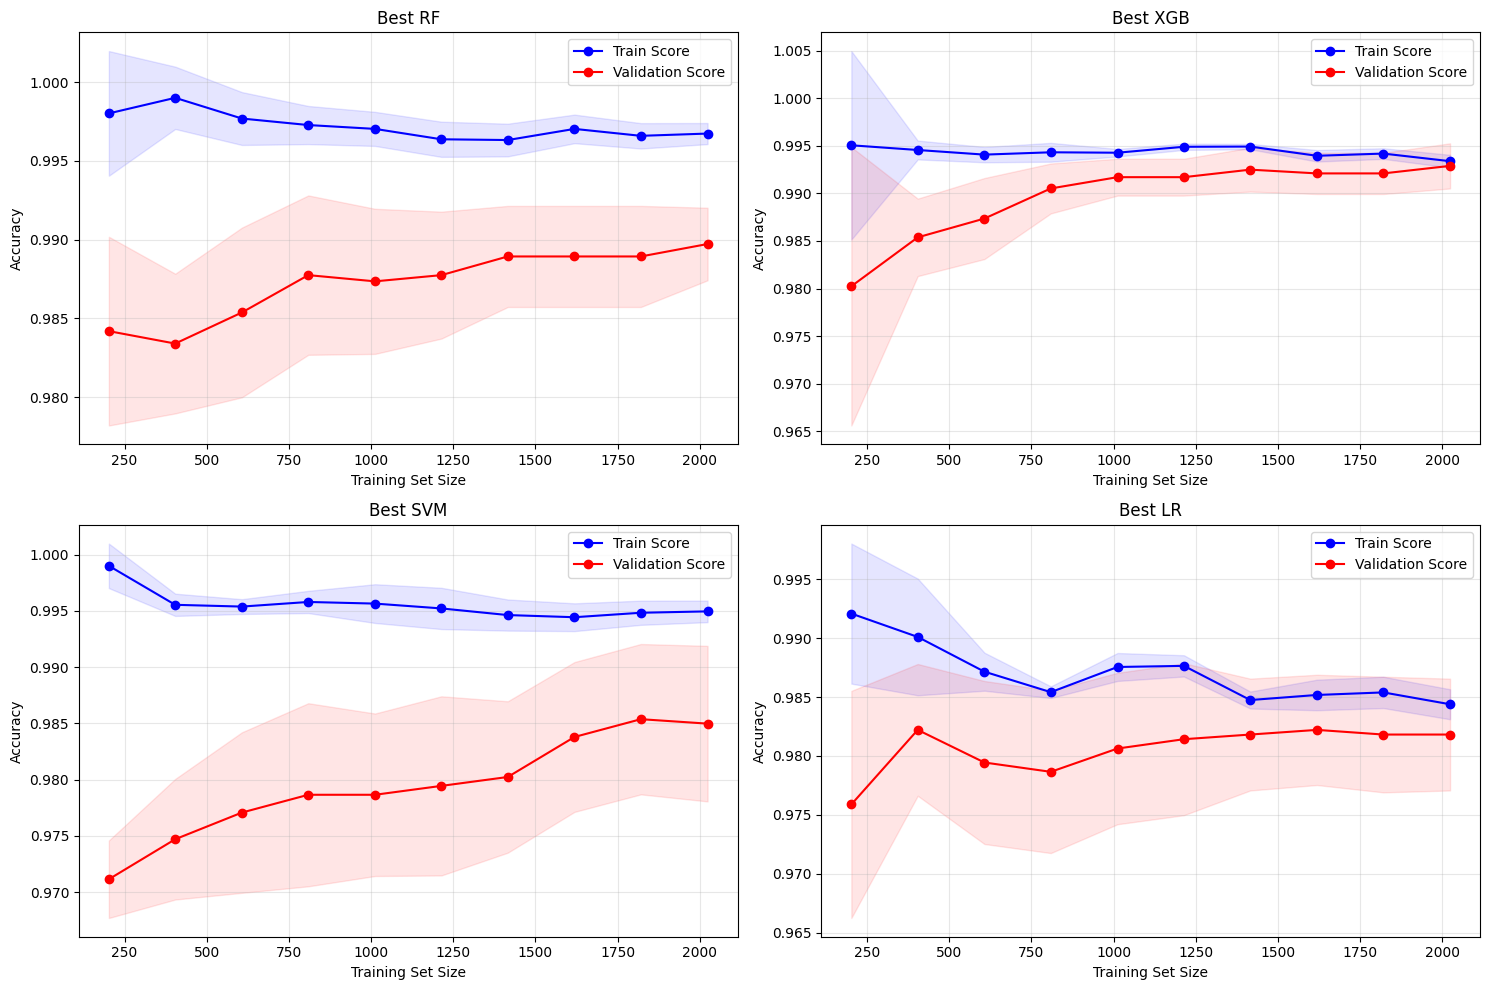

In [72]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves_grid(models_dict, X, y, cv=5):
    """Plot learning curves for multiple models in a 2x2 grid"""
    model_items = list(models_dict.items())
    n_models = len(model_items)

    # Plot in chunks of 4
    for i in range(0, n_models, 4):
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()

        for j in range(4):
            if i + j >= n_models:
                axes[j].axis('off')
                continue

            name, model = model_items[i + j]
            if model is None:
                axes[j].axis('off')
                continue

            train_sizes, train_scores, val_scores = learning_curve(
                model, X, y, cv=cv, n_jobs=-1,
                train_sizes=np.linspace(0.1, 1.0, 10),
                scoring='accuracy'
            )

            train_scores_mean = train_scores.mean(axis=1)
            train_scores_std = train_scores.std(axis=1)
            val_scores_mean = val_scores.mean(axis=1)
            val_scores_std = val_scores.std(axis=1)

            axes[j].plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Train Score')
            axes[j].fill_between(train_sizes, train_scores_mean - train_scores_std,
                                 train_scores_mean + train_scores_std, alpha=0.1, color='blue')

            axes[j].plot(train_sizes, val_scores_mean, 'o-', color='red', label='Validation Score')
            axes[j].fill_between(train_sizes, val_scores_mean - val_scores_std,
                                 val_scores_mean + val_scores_std, alpha=0.1, color='red')

            axes[j].set_title(name)
            axes[j].set_xlabel('Training Set Size')
            axes[j].set_ylabel('Accuracy')
            axes[j].legend()
            axes[j].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

# Use the function for your selected models
print("\nGenerating Learning Curves in 2x2 grid...")
plot_learning_curves_grid(selected_models, X_train_scaled, y_train)


# **Step 20: Hyperparameter Sensitivity Analysis**


HYPERPARAMETER SENSITIVITY ANALYSIS


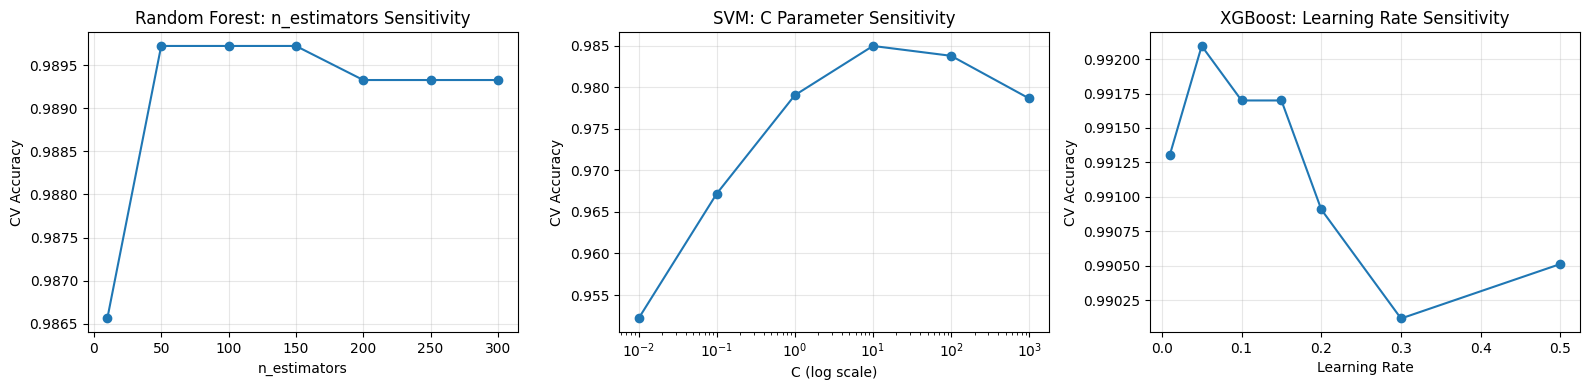

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

print("\n" + "="*50)
print("HYPERPARAMETER SENSITIVITY ANALYSIS")
print("="*50)

def hyperparameter_sensitivity(model_type, param_name, param_values, base_params):
    """Analyze sensitivity to a specific hyperparameter"""
    scores = []

    for value in param_values:
        params = base_params.copy()
        params[param_name] = value

        if model_type == 'RandomForest':
            model = RandomForestClassifier(**params, random_state=42)
        elif model_type == 'SVM':
            model = SVC(**params, random_state=42)
        elif model_type == 'XGBoost':
            model = XGBClassifier(**params, random_state=42, eval_metric='logloss')

        # Cross-validation score
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        scores.append(cv_scores.mean())

    return scores

# Random Forest sensitivity to n_estimators
rf_base = {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
n_estimators_values = [10, 50, 100, 150, 200, 250, 300]
rf_scores = hyperparameter_sensitivity('RandomForest', 'n_estimators', n_estimators_values, rf_base)

# SVM sensitivity to C
svm_base = {'kernel': 'rbf', 'gamma': 'scale'}
C_values = [0.01, 0.1, 1, 10, 100, 1000]
svm_scores = hyperparameter_sensitivity('SVM', 'C', C_values, svm_base)

# XGBoost sensitivity to learning_rate
xgb_base = {'n_estimators': 100, 'max_depth': 5}
lr_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.5]
xgb_scores = hyperparameter_sensitivity('XGBoost', 'learning_rate', lr_values, xgb_base)

# Plotting
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
plt.plot(n_estimators_values, rf_scores, 'o-')
plt.xlabel('n_estimators')
plt.ylabel('CV Accuracy')
plt.title('Random Forest: n_estimators Sensitivity')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.semilogx(C_values, svm_scores, 'o-')
plt.xlabel('C (log scale)')
plt.ylabel('CV Accuracy')
plt.title('SVM: C Parameter Sensitivity')
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(lr_values, xgb_scores, 'o-')
plt.xlabel('Learning Rate')
plt.ylabel('CV Accuracy')
plt.title('XGBoost: Learning Rate Sensitivity')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# **Step 22: Final Model Deployment Preparation**

In [74]:
print("\n" + "="*50)
print("MODEL DEPLOYMENT PREPARATION")
print("="*50)

# Get the best model info from comparison_df
best_model_name = comparison_df.index[0]
best_accuracy = comparison_df.iloc[0]['Accuracy']
print(f"Selected model for deployment: {best_model_name}")
print(f"Expected accuracy: {best_accuracy:.4f}")

# Define deployment-ready class
class ThyroidClassifier:
    def __init__(self, model, scaler, feature_names):
        self.model = model
        self.scaler = scaler
        self.feature_names = feature_names
        self.model_name = best_model_name
        self.expected_accuracy = best_accuracy

    def predict(self, X):
        """Make predictions on new data"""
        X_scaled = self.scaler.transform(X)
        return self.model.predict(X_scaled)

    def predict_proba(self, X):
        """Get prediction probabilities"""
        X_scaled = self.scaler.transform(X)
        if hasattr(self.model, 'predict_proba'):
            return self.model.predict_proba(X_scaled)
        else:
            preds = self.model.predict(X_scaled)
            return np.column_stack([1 - preds, preds])

    def get_model_info(self):
        """Get model information"""
        return {
            'model_name': self.model_name,
            'expected_accuracy': self.expected_accuracy,
            'feature_names': list(self.feature_names),
            'model_type': type(self.model).__name__
        }

# Load the actual model object
if best_model_name in grid_results:
    deployment_model = grid_results[best_model_name]['model']
elif 'SVM' in best_model_name:
    deployment_model = best_svm
elif 'Neural Network' in best_model_name:
    deployment_model = nn_results[best_model_name]['model']
else:
    deployment_model = grid_results[list(grid_results.keys())[0]]['model']  # Fallback

# Instantiate the wrapper class
thyroid_classifier = ThyroidClassifier(
    model=deployment_model,
    scaler=scaler,
    feature_names=X.columns
)

print("\n✅ Deployment model created successfully!")
print("🔍 Model info:", thyroid_classifier.get_model_info())

# Test the deployment model
print("\n🧪 Testing deployment model on a sample...")
sample_idx = 0
sample_data = X_test.iloc[[sample_idx]]
prediction = thyroid_classifier.predict(sample_data)[0]
probability = thyroid_classifier.predict_proba(sample_data)[0]
print(f"🧠 Sample prediction: {prediction} ({'Hypothyroid' if prediction == 1 else 'Negative'})")
print(f"📊 Prediction probabilities: [Negative: {probability[0]:.4f}, Hypothyroid: {probability[1]:.4f}]")
print(f"✅ Actual label: {y_test.iloc[sample_idx]} ({'Hypothyroid' if y_test.iloc[sample_idx] == 1 else 'Negative'})")



MODEL DEPLOYMENT PREPARATION
Selected model for deployment: XGBoost
Expected accuracy: 0.9889

✅ Deployment model created successfully!
🔍 Model info: {'model_name': 'XGBoost', 'expected_accuracy': np.float64(0.9889), 'feature_names': ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'], 'model_type': 'XGBClassifier'}

🧪 Testing deployment model on a sample...
🧠 Sample prediction: 0 (Negative)
📊 Prediction probabilities: [Negative: 0.9923, Hypothyroid: 0.0077]
✅ Actual label: 0 (Negative)
